# How well do jobs and skills pay for Data Analysts 

Methodology: 

1. Evaluate median salary for top 6 data jobs 
2. Find median salary per skill for Data Analysts
3. Visualizze for highest paying skills and most demanded skills

In [1]:
# importing libraries/Loading data/minor data cleanup 
import ast
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv(r'C:\Users\nickg\Desktop\Python\Data\data_jobs.csv')
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
# filter for only United States Positions 
df_us = df[df['job_country']== 'United States'].dropna(subset='salary_year_avg') # dropping na values 

In [3]:
# Grab the top 6 job roles by count 
job_titles = df_us['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
# add this job filter to our dataframe 
df_us_Top6 = df_us[df_us['job_title_short'].isin(job_titles)]
df_us_Top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",NaN,NaN
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [5]:
job_order = df_us_Top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index # creating a median salary aggregation table to use for ordering. 

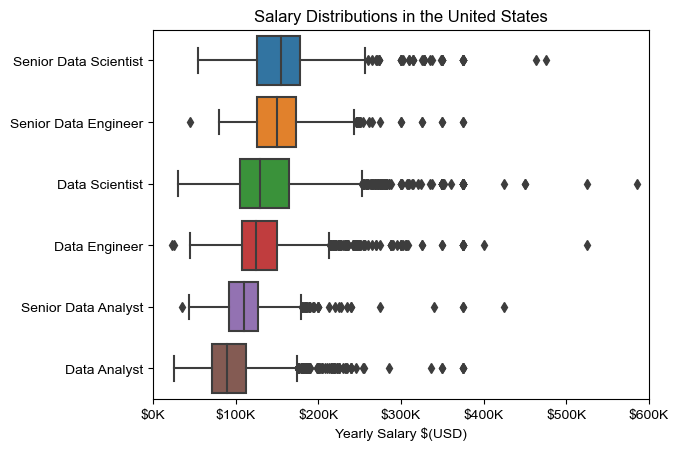

In [6]:
# plotting the salary distrubtions for top 6 roles, Notice they are the same roles yet divided into general and senior 
sns.boxplot(data=df_us_Top6, x='salary_year_avg', y='job_title_short', order = job_order) # sort by median salary from the job order variable above 
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United States')
plt.ylabel('')
plt.xlabel('Yearly Salary $(USD)')
plt.xlim(0, 600000)
ticks_xaxis = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_xaxis)
plt.show()

# Investigate Median Salary VS Skill for Data Analysts 

In [7]:
# create a copy of our United States Dataframe, yet filtering only by the Data Analyst Postion now. 
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']== 'United States')].copy() 
df_da_us = df_da_us.dropna(subset='salary_year_avg') # dropping na values

In [8]:
#explode the job skills column from the list to row values 
df_da_us = df_da_us.explode('job_skills') # exploding skills
df_da_us[['salary_year_avg', 'job_skills']].head(5) #viewing to see changes 

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [9]:
# creating an aggregated table of job skill count and median salary. Then grab the top 10 values 
# in this table we are specifically findiing the highest paying (not the most common) skills
df_da_us_top_pay = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

In [10]:
# viewing the aggregated table 
df_da_us_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [11]:
# now to create another aggregated table, this time by the top 10 most common skills and their median salary 
df_da_us_top_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

In [12]:
# re-sort these top 10 most common skills lastly by median salary 
df_da_us_top_skills = df_da_us_top_skills.sort_values(by='median', ascending=False)
df_da_us_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


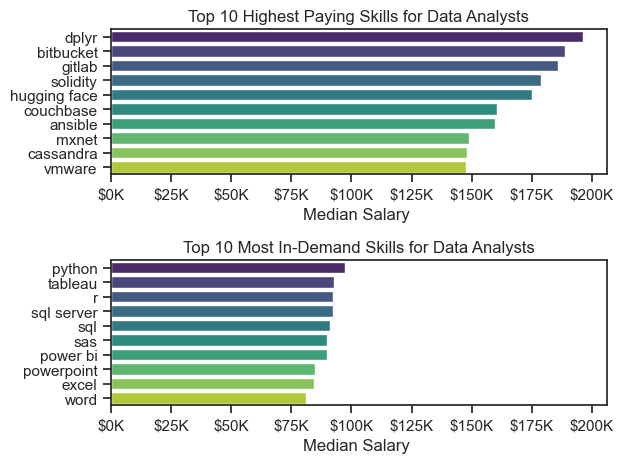

In [18]:
# plot both the top 10 highest paying skills and the 10 most in demand skills 
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_da_us_top_pay, x='median', y=df_da_us_top_pay.index, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Median Salary ')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))#changing the x-axis values to currency 
ax[0].set_ylabel('') # remove the y-axis label, the title is sufficient
ax[0].set_title('Top 10 Highest Paying Skills for Data Analysts')


sns.barplot(data=df_da_us_top_skills, x='median', y=df_da_us_top_skills.index, ax=ax[1],palette='viridis') # plotting with seaborn
 # flipping the order of the barh 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')) #changing the x-axis values to currency 
# ax[1].invert_yaxis() Dont have to invert with seaborn! 
ax[1].set_ylabel('') # remove y label 
ax[1].set_xlabel('Median Salary ')
ax[1].set_xlim(ax[0].get_xlim()) # matching xlim or xaxis values to the chart above it. 
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')

plt.tight_layout()
plt.show()